In [876]:
# Use the Azure Machine Learning data preparation package
from azureml.dataprep import package

# Use the Azure Machine Learning data collector to log various metrics
from azureml.logging import get_azureml_logger
logger = get_azureml_logger()


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
do_grid_search_cv = True
do_pca = False

In [877]:
# Use Azure Machine Learning history magic to control history collection
# History is off by default, options are "on", "off", or "show"
# %azureml history on


In [878]:
# This call will load the referenced package and return a DataFrame.
# If run in a PySpark environment, this call returns a
# Spark DataFrame. If not, it returns a Pandas DataFrame.
features = package.run('dprep1.dprep', dataflow_idx=2)
submission_test_data = package.run('dprep1.dprep', dataflow_idx=3)

feature_names = features.columns.get_values()

In [879]:
features.head(5)

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,0.408,0.057,0.254,0.066,0.516,0.235,0.176,0.109,0.039,0.829,...,0.297,0.230,0.131,0.089,NaN,0.332,13.0,1650.0,1489.0,312.0
1,0.556,0.039,0.260,0.143,0.503,0.272,0.101,0.410,0.070,0.493,...,0.288,0.190,0.090,0.082,0.181,0.265,10.0,2010.0,2480.0,257.0
2,0.541,0.057,0.070,0.023,0.522,0.179,0.115,0.202,0.198,0.479,...,0.212,0.156,0.084,0.098,0.195,0.209,10.0,629.0,690.0,195.0
3,0.500,0.061,0.203,0.059,0.525,0.200,0.164,0.013,0.049,0.897,...,0.285,NaN,0.104,0.058,NaN,0.238,13.0,1810.0,6630.0,218.0
4,0.471,0.050,0.225,0.103,0.511,0.237,0.171,0.025,0.008,0.953,...,0.284,0.234,0.137,0.070,0.194,0.290,9.0,3489.0,2590.0,355.0


In [880]:
# finding and dealing with outliers
n_samples = features.shape[0]

feature_mean = np.mean(features, axis=0)
feature_sd = np.std(features, axis=0)
feature_lower = feature_mean-2.25*feature_sd
feature_upper = feature_mean+2.25*feature_sd

for name in feature_names:
    q = name + '<' + str(feature_lower[name]) + ' | ' + name + '>' + str(feature_upper[name])
    print(name, ': ', features.query(q)[name].count() / n_samples)

features = features.clip(feature_lower, feature_upper, axis=1)

econ__pct_civilian_labor :  0.026579111945
econ__pct_unemployment :  0.0259537210757
econ__pct_uninsured_adults :  0.0237648530331
econ__pct_uninsured_children :  0.0337711069418
demo__pct_female :  0.0325203252033
demo__pct_below_18_years_of_age :  0.0368980612883
demo__pct_aged_65_years_and_older :  0.0328330206379
demo__pct_hispanic :  0.0503439649781
demo__pct_non_hispanic_african_american :  0.0500312695435
demo__pct_non_hispanic_white :  0.036272670419
demo__pct_american_indian_or_alaskan_native :  0.0196998123827
demo__pct_asian :  0.0281425891182
demo__pct_adults_less_than_a_high_school_diploma :  0.0272045028143
demo__pct_adults_with_high_school_diploma :  0.0250156347717
demo__pct_adults_with_some_college :  0.0200125078174
demo__pct_adults_bachelors_or_higher :  0.0397123202001
demo__birth_rate_per_1k :  0.036272670419
demo__death_rate_per_1k :  0.031894934334
health__pct_adult_obesity :  0.0393996247655
health__pct_adult_smoking :  0.0234521575985
health__pct_diabetes :  0.

In [881]:
submission_test_data.head(5)

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__pop_per_dentist,health__pop_per_primary_care_physician
0,2.0,0.469,0.070,0.211,0.156,0.499,0.184,0.236,0.114,0.006,...,11.0,0.217,0.166,0.078,0.079,0.217,0.162,11.0,1569.0,1559.0
1,3.0,0.509,0.061,0.182,0.056,0.514,0.211,0.141,0.203,0.078,...,9.0,0.283,0.172,0.099,0.078,0.183,0.269,10.0,1709.0,1069.0
2,7.0,0.479,0.042,0.294,0.131,0.514,0.245,0.170,0.119,0.054,...,11.0,0.288,0.184,0.094,0.078,0.105,0.275,10.0,1789.0,1990.0
3,9.0,0.444,0.058,0.142,0.032,0.487,0.193,0.167,0.025,0.078,...,11.0,0.318,0.281,0.098,0.088,NaN,0.273,12.0,2860.0,2509.0
4,12.0,0.395,0.042,0.299,0.179,0.514,0.277,0.125,0.561,0.027,...,8.0,0.302,NaN,0.103,0.131,NaN,0.263,11.0,4639.0,2189.0


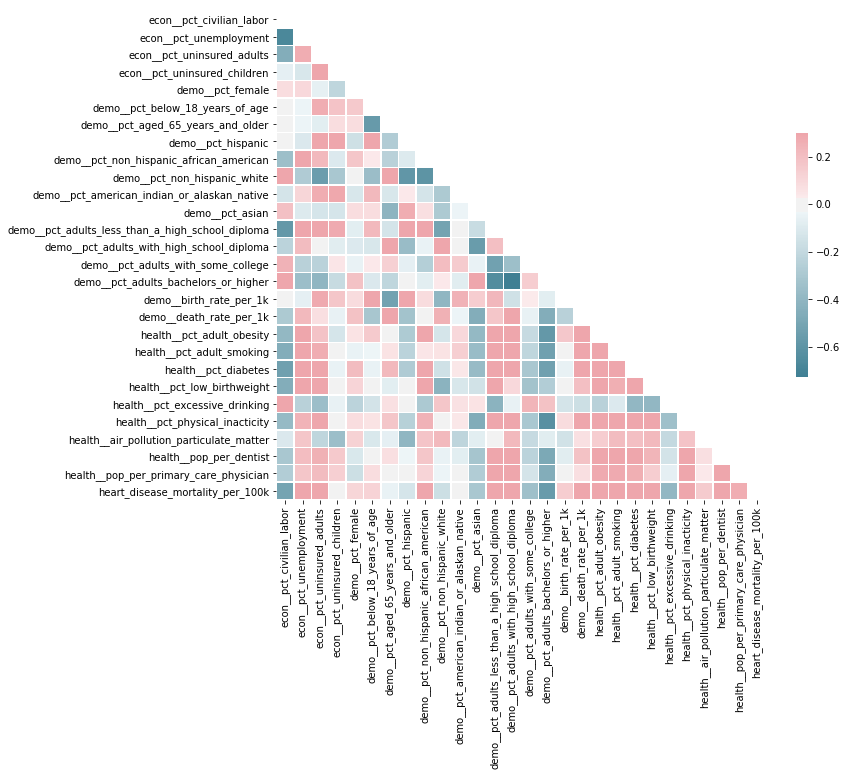

In [882]:
dff = features #[['health__pct_adult_smoking', 'health__pct_excessive_drinking', 'demo__death_rate_per_1k']]


# Compute the correlation matrix
corr = dff.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [883]:
# select just a few predictors
#predictors = ['health__pct_physical_inacticity', 'health__pct_diabetes', 'econ__pct_civilian_labor',
#             'demo__pct_adults_less_than_a_high_school_diploma', 'demo__pct_adults_bachelors_or_higher']
#
#features = features[predictors + ['heart_disease_mortality_per_100k']]
#submission_test_data = submission_test_data[predictors]

In [884]:
missing_replacements = features.mean()

features.fillna(missing_replacements, inplace=True)

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_adult_obesity,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k
0,0.408,0.05700,0.254000,0.066000,0.5160,0.235000,0.17600,0.109000,0.039000,0.8290,...,0.297000,0.23000,0.131000,0.089000,0.16457,0.332000,13.000000,1650.000000,1489.000000,312.000000
1,0.556,0.03900,0.260000,0.143000,0.5030,0.272000,0.10100,0.410000,0.070000,0.4930,...,0.288000,0.19000,0.090000,0.082000,0.18100,0.265000,10.000000,2010.000000,2480.000000,257.000000
2,0.541,0.05700,0.070000,0.023000,0.5220,0.179000,0.11500,0.202000,0.198000,0.4790,...,0.212000,0.15600,0.084000,0.098000,0.19500,0.209000,10.000000,629.000000,690.000000,195.000000
3,0.500,0.06100,0.203000,0.059000,0.5250,0.200000,0.16400,0.013000,0.049000,0.8970,...,0.285000,0.21261,0.104000,0.058000,0.16457,0.238000,13.000000,1810.000000,6630.000000,218.000000
4,0.471,0.05000,0.225000,0.103000,0.5110,0.237000,0.17100,0.025000,0.008000,0.9530,...,0.284000,0.23400,0.137000,0.070000,0.19400,0.290000,9.000000,3489.000000,2590.000000,355.000000
5,0.501,0.04800,0.212000,0.055000,0.5160,0.207000,0.12100,0.022000,0.046000,0.9030,...,0.283000,0.22000,0.112000,0.089000,0.06700,0.272000,13.000000,2439.000000,1540.000000,288.000000
6,0.462,0.08800,0.180000,0.039000,0.5070,0.221000,0.16700,0.034000,0.002000,0.9420,...,0.305000,0.20500,0.110000,0.070000,0.19300,0.282000,12.000000,3100.000000,3689.000000,283.000000
7,0.425,0.07700,0.252000,0.079000,0.4990,0.247000,0.13400,0.053000,0.224000,0.6810,...,0.317000,0.26400,0.131000,0.092000,0.13000,0.277000,13.000000,2800.000000,1790.000000,315.000000
8,0.313,0.11100,0.275000,0.063000,0.4730,0.248000,0.11000,0.015000,0.422117,0.3024,...,0.404915,0.20800,0.127000,0.133953,0.10600,0.373000,12.000000,3990.000000,3549.000000,411.993563
9,0.371,0.04400,0.241000,0.110000,0.4890,0.304838,0.12100,0.014000,0.000000,0.4260,...,0.332000,0.34100,0.101000,0.073000,0.21400,0.333000,9.000000,3306.509018,2423.094195,309.000000


In [885]:
# Labels are the values we want to predict
labels = np.array(features['heart_disease_mortality_per_100k'])

# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('heart_disease_mortality_per_100k', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)


In [886]:
# PCA
from sklearn.decomposition import PCA

features_reduced = features

if do_pca:
    pca = PCA(n_components=30, whiten=True)
    features_reduced = pca.fit_transform(features)

In [887]:
# data normalization
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
features_norm = normalizer.fit_transform(features_reduced)

In [888]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_norm, labels, test_size = 0.2, random_state = 42)

In [889]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2558, 27)
Training Labels Shape: (2558,)
Testing Features Shape: (640, 27)
Testing Labels Shape: (640,)


In [890]:
# Import the model we are using
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge


# Create the parameter grid based on the results of random search 
rf_param_grid = {
    'bootstrap': [True],
    'oob_score': [False],
    'max_depth': [80, 95, 110],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [5, 20, 35],
    'min_samples_split': [2, 16, 32],
    'n_estimators': [500, 1000]
}

# Linreg and Bayesian Ridge as baseline
lreg = LinearRegression()
bayes = BayesianRidge()

# Train the model on training data
lreg.fit(train_features, train_labels)
bayes.fit(train_features, train_labels)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [ ]:
# Train random forest

rf = RandomForestRegressor(
    bootstrap= True,
    criterion= 'mse',
    max_depth= 95,
    max_features='auto',
    max_leaf_nodes= None,
    min_impurity_split= 1e-07,
    min_samples_leaf= 5,
    min_samples_split= 2,
    min_weight_fraction_leaf= 0.0,
    n_estimators= 1000,
    n_jobs= -1,
    oob_score= True,
    random_state= None,
    verbose= 0,
    warm_start= False
)

if do_grid_search_cv:
    # Instantiate the grid search model
    rf_grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, 
                          cv = 6, n_jobs = -1, verbose = 2)
    rf_grid_search.fit(train_features, train_labels)
    rf = rf_grid_search.best_estimator_
    rf.get_params()

# Fit the model on all the training data
rf.fit(train_features, train_labels)

Fitting 6 folds for each of 162 candidates, totalling 972 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min


In [ ]:
#Neural network
from sklearn.neural_network import MLPRegressor

nnet = MLPRegressor(
    hidden_layer_sizes=(80, 40),
    solver = 'lbfgs',
    alpha = 0.01
)

nnet.fit(train_features, train_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Use the model's predict method on the test data
predictions = rf.predict(test_features)
rmse_rf = sqrt(mean_squared_error(test_labels, predictions))

predictions = lreg.predict(test_features)
rmse_lreg = sqrt(mean_squared_error(test_labels, predictions))

predictions = bayes.predict(test_features)
rmse_bayes = sqrt(mean_squared_error(test_labels, predictions))

predictions = nnet.predict(test_features)
rmse_nnet = sqrt(mean_squared_error(test_labels, predictions))

In [ ]:
# predict on the submission test data
row_ids = np.array(submission_test_data['row_id'])

submission_test_data = submission_test_data.drop('row_id', axis = 1)

submission_test_data.fillna(replacements, inplace=True)

if do_pca:
    submission_test_data = pca.transform(submission_test_data)
    
submission_test_data = submission_test_data.clip(feature_lower, feature_upper, axis=1)

submission_test_data = normalizer.transform(submission_test_data)   

submission_predictions = rf.predict(submission_test_data)

output = pd.DataFrame({'row_id': row_ids, 'heart_disease_mortality_per_100k': submission_predictions}).astype('int32')

In [ ]:
submission_test_data

In [ ]:
output.astype('int32').to_csv('submission.csv', columns=['row_id','heart_disease_mortality_per_100k'], index=False)

In [ ]:
importances = rf.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.tree import export_graphviz

for i in range(20):
    export_graphviz(rf.estimators_[i],
                    out_file='dump/rftree_{i}.dot'.format(i=i),
                    feature_names=feature_names,
                    filled=True,
                    rounded=True)
    

In [ ]:
print('RMSE Random Forest Regression:', round(np.mean(rmse_rf), 2))
print('RMSE Linear Regression:', round(np.mean(rmse_lreg), 2))
print('RMSE Bayesian Ridge Regression:', round(np.mean(rmse_bayes), 2))
print('RMSE Neural Net Regression:', round(np.mean(rmse_nnet), 2))

print('Done!')